In [17]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [13]:
data_rfm = pd.read_csv('../data/RFM_score.csv')
data_rfm

,R,F,M
0,4,4,1
1,1,2,2
2,2,5,5
3,5,3,2
4,5,5,5
...,...,...,...
5417,2,4,4
5418,3,4,1
5419,1,1,2
5420,1,1,1


Plotting functions

In [34]:
def plot_2d(data,col):
    fig, axs = plt.subplots(2,2,figsize=(12,12))
    for i in range(2):
        for j in range(2):
            axs[i, j].scatter(data[col[i]],data[col[j]],c=data['Cluster'],cmap='viridis',s=5)
            axs[i, j].set_xlabel(col[i])
            axs[i, j].set_ylabel(col[j])
    fig.tight_layout()  

Normalizing Data

In [12]:
def normalize_data(data, columns):
    scaler = preprocessing.MinMaxScaler()
    d = scaler.fit_transform(data[columns])
    scaled_df = pd.DataFrame(d, columns=columns)
    for c in columns :
        data['N'+c] = scaled_df[c]

In [19]:
normalize_data(data_rfm, ['R','F','M'])
data_rfm.head()

,R,F,M,NR,NF,NM
0,4,4,1,0.75,0.75,0.00
1,1,2,2,0.00,0.25,0.25
2,2,5,5,0.25,1.00,1.00
3,5,3,2,1.00,0.50,0.25
4,5,5,5,1.00,1.00,1.00


In [20]:
data_rfm = data_rfm[['NR','NF','NM']]
data_rfm.head()

,NR,NF,NM
0,0.75,0.75,0.00
1,0.00,0.25,0.25
2,0.25,1.00,1.00
3,1.00,0.50,0.25
4,1.00,1.00,1.00


PCA

In [21]:
pca = PCA(n_components=2,whiten=False).fit(data_rfm)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)
transformados = pca.fit_transform(data_rfm)
print(transformados)

[0.61221449 0.26124009]
[35.36880171 23.10406795]
[[-0.51388895 -0.61372637 -0.59938143]
 [-0.84470938  0.2401557   0.47832134]]
[[ 0.02118204 -0.35243918]
 [ 0.56361658  0.28059534]
 [-0.47468651  0.60827577]
 ...
 [ 0.71704817  0.22055641]
 [ 0.86689352  0.10097608]
 [ 0.5849897  -0.05016234]]


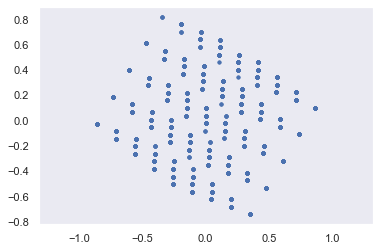

In [23]:
plt.plot(transformados[:,0],transformados[:,1],'.')
plt.axis('equal')
plt.grid()

In [30]:
rfmdf = pd.DataFrame(transformados)
rfmdf.columns = ['x', 'y']
rfmdf.reset_index()
rfmdf.head()

,x,y
0,0.021182,-0.352439
1,0.563617,0.280595
2,-0.474687,0.608276
3,-0.103704,-0.504075
4,-0.860103,-0.025256


KMeans

In [31]:
def kmeans_(data,n,col):
    #initiliaze model
    kmeans = KMeans(n_clusters=n, random_state=123, max_iter=800, n_init=30, algorithm='full')
    #fitting
    data['Cluster'] = kmeans.fit_predict(data[col])

K = 4

In [32]:
kmeans_(rfmdf, 4, ['x','y'])

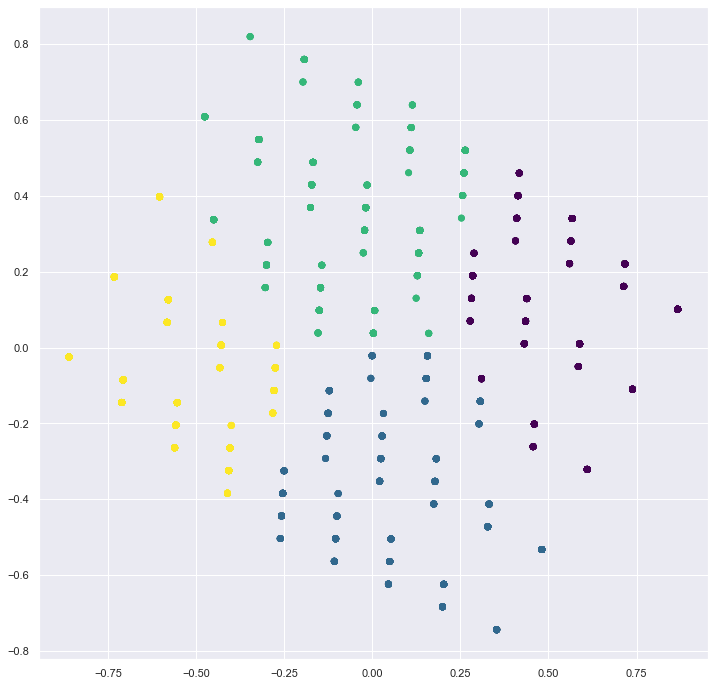

In [50]:
plt.figure(figsize=(12, 12))
plt.scatter('x','y',c='Cluster',cmap='viridis', s=35, data=rfmdf)
plt.show()